É uma demonstração de como o aprendizado de máquinas pode contribuir para a compreensão mais aprofundada da realidade. Os dados serão coletados da competição Telecom Churn Case Study Hackathon (https://www.kaggle.com/competitions/telecom-churn-case-study-hackathon-c46) do kaggle para a previsão de cancelamento de planos de telefone entre os meses de junho, julho e agosto.

In [ ]:
!pip3 install shap # Instalação de biblioteca

import numpy
import pandas
from sklearn.ensemble import RandomForestClassifier
import shap

In [ ]:
churn=pandas.read_csv('/train.csv')# A tabela que será usada
churn.tail(3)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [ ]:
churn.describe()# Rápida descrição de números via pandas

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


Uma separação de colunas que não será utilizada no presente exemplo.

In [ ]:
churn = churn.fillna(0)

x=churn.drop(['id','churn_probability','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
              'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6',
              'date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

y = churn['churn_probability']

O DecisionTree é um tipo de inteligência artificial de aprendizagem de árvore.

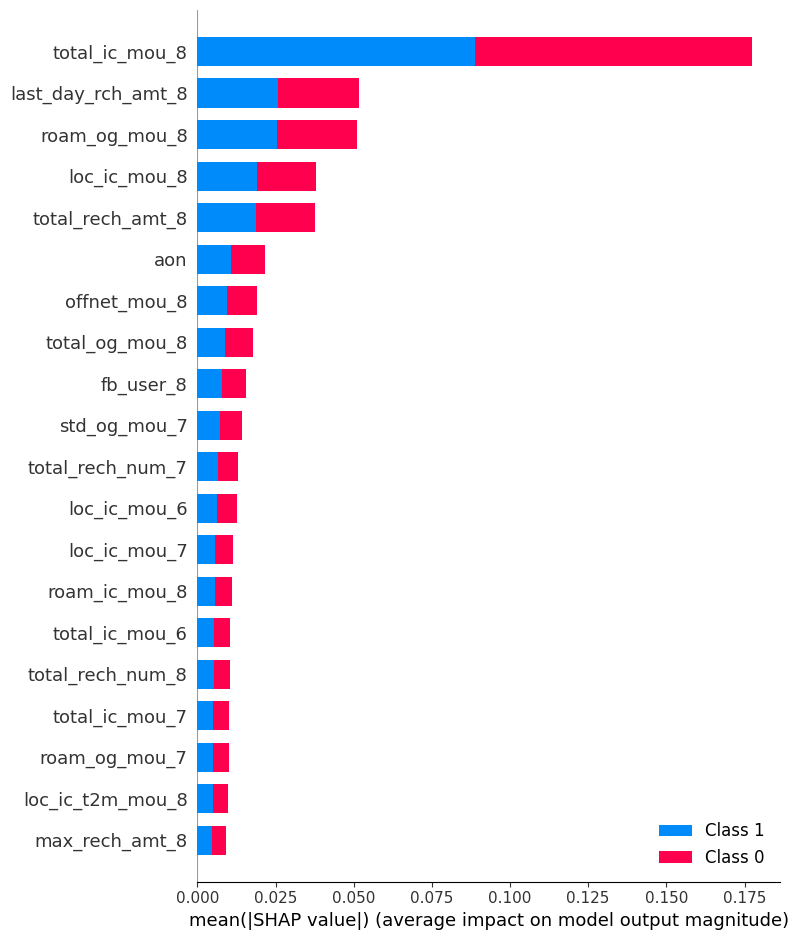

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier(random_state=30)
predicao = rf.fit(x,y)

explainer=shap.TreeExplainer(rf)
shap_values=explainer.shap_values(x)

shap.summary_plot(shap_values,x)

Maquina identificou um padrão de cancelamento para essas três colunas: total_ic_mou_8(total de chamadas recebidas por minutos de uso da KPI para o mês de agosto),last_day_rch_amt_8(valor do último dia em moeda local KPI para o mês de agosto) e roam_og_mou_8(Indica que o cliente está na zona de itinerância durante o KPI de minutos de utilização de chamadas de voz do mês de agosto), forma mais rápida de analisar dados de uma grande tabela.